# **Naps and Memory Scores**

## **Permissions**

* [ X ] YES - make available
* [  ] NO - keep private

# **Names**

- Kareema Kilani
- Esmeralda Mejia Trejo
- Kamran Jahadi
- Abdiaziz Weheliye

# **Overview**

Employing EEG data from a study observing the effects of naps on memory based tasks, we took measurements from specific channels in order to make predictions on the scores of the patients. Bringing into action Fp2, F3, Fz, F4, F8, FC5, FC1, FC6 from the Frontal Cortex, the effects were measured coherently. Our results are based upon these channels and specifically these scores, so the effects observed are limited to those.

<a id='research_question'></a>
# **Research Question**

We specifically are looking to utilize the EEG data in a way that by observing the results of the pre/post nap data we could predict which of our subjects was inclined to score better on their task


Abbreviation/Term  

WM/Working Memory  

EEG/Electroencephalography

L2/Low-load Working Memory Task

L5/High-Load Working Memory Task

REC1/Task Record Before Napping

REC2/Task Record After Napping



In [28]:
import os
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

import mne
import requests 
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
from mne.preprocessing import create_eog_epochs, ICA

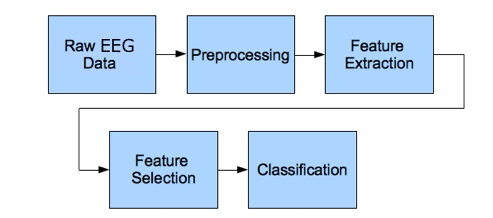





<a id='background'></a>

## **Background & Prior Work**

In addition to the main dataset we were looking at, we also referenced multiple sources for more information on naps and their observed influence. With Belenky’s work on sleep deprivation we saw that those without sleep were highly affected. To the point that they observed “degraded psychomotor vigilance performance in a sleep-dose-dependent manner”. Showing us how sleep can affect these types of functions. We have also seen that previous research has been done with the positive effects that naps can have on the subjective, behavioral and physiological measures, through the work of Hayashi.  A study of seven young adult University students consisted of having a week of napping (for 20 minutes in the afternoon) and one of no napping on and off every week. The results were significant and showed a positive correlation between napping (compared to no napping) which “had positive effects on the maintenance of the subsequent vigilance level. It also improved the performance of the higher cognition demand tasks of logical reasoning and calculation”(Hayashi M, Watanabe M, Hori T 1999). Naps have also been shown to decrease overall sleepiness and less error making as discussed in a study on night shift workers who napped vs those who did not nap(Della Rocco, P. 2000). Studies utilizing working memory based abilities with EEG have also been conducted (Zhang Yuanyuan 2019) in which the frontal lobes have been stressed in importance with regards to memory and function. In this study 45 university students aged 18 to 22 who were recruited, where without the effects of alcohol or caffeine, were to sleep with EEG bandpass. Where further they would attempt to quantify the relationship of neural dynamics and working memory.

References:
- 1) Belenky, Gregory, et al. “Patterns of Performance Degradation and Restoration during Sleep Restriction and Subsequent Recovery: A Sleep Dose-Response Study.” Journal of Sleep Research, vol. 12, no. 1, 21 Feb. 2003, pp. 1–12., https://doi.org/10.1046/j.1365-2869.2003.00337.x. 


- 2) Della Rocco, P.S., Comperatore, C., Caldwell, L., and Cruz, C et al. “The Effects of Napping on Night Shift Performance” Office of Aviation Medicine Federal Aviation Administration,https://www.faa.gov/data_research/research/med_humanfacs/oamtechreports/2000s/media/00_10.pdf, Feb. 2000


- 3) Ellmore, Timothy, et al. “Nap EEG.” OSF, OSF, 29 July 2016, https://osf.io/chav7/. 


- 4) Mei, Ning et al. “A high-density scalp EEG dataset acquired during brief naps after a visual working memory task.” Data in brief vol. 18 1513-1519. 25 Apr. 2018, doi:10.1016/j.dib.2018.04.073


- 5) Hayashi, Mitsuo, et al. “The Effects of a 20 Min Nap in the Mid-Afternoon on Mood, Performance and EEG Activity.” Clinical Neurophysiology, vol. 110, no. 2, 1999, pp. 272–279., https://doi.org/10.1016/s1388-2457(98)00003-0. 


- 6) Zhang, Y., Wang, C., Wu, F., Huang, K., Yang, L., &amp; Ji, L. (2019, December 19). Prediction of working memory ability based on EEG by functional data analysis. Journal of Neuroscience Methods. Retrieved March 17, 2022, from https://www.sciencedirect.com/science/article/pii/S0165027019304091?via%3Dihub#fig0005

# **Hypothesis**


Our team hypothesized that through EEG data by looking for signs of worse quality sleep we can predict which of our subjects will do worse on their exams. We examined the data and at first our hypothesis was looking at the converse, where we looked for better scores, however after a thorough search of the test results, we concluded that we should be looking for our participants' chances of scoring lower based on their associated EEG data. The negative results had more extreme data, while the positive results were typically similar to the original score,with some deviation. Our EEG data allows insights into our participants' sleep quality and activity during their sleep, which we will further utilize in prediction models to interpret their scores. We believe that we can predict these negative scores because of the drastic differences in the scores and the frontal cortex has shown to have connections to memory.


# **Dataset(s)**

The datasets for our research is from a Nap EEG study done in 2016 created by Timothy Ellmore, Ning Mei, Kenneth Ng, and Karen Tatiana Navarro. The data consists of electroencephalogram (EEG) recording of brain activity measured by electrodes. They created a study with the objective of recording “64 channel continuously-sampled scalp EEG data from humans napping after completing a scene working memory task.” (Ning) These data are being used to develop objective and automated methods for sleep stage identification and for classifying spindles and k-complexes in stage 2 NREM sleep.

- Dataset Name: NapEEGBehavior
- Link to the dataset: Participant Info and Scores
https://docs.google.com/spreadsheets/u/1/d/1dCC8X0nd10wd1l8WV9YKMKqhOED9CSFk/edit?usp=sharing&ouid=108349162460439421981&rtpof=true&sd=true
- Number of observations: 20 participants

Our first data set includes a csv excel sheet of the 20 participants’ age, sex, and percentage score on the low-load memory task(L2) as well as the high-load memory task (L5) before (REC1) and after (REC2) a 30 - 60min nap took place. To be more specific, the low-load memory task consisted of an encoding period where new info is presented (for 2000 ms), a delay period (maintained it in memory for 6000 ms), and finally a probe period with 50 positive (scenes shown in the encoding period) and 50 negative probes(scenes not shown in encoding period). The high-load was similar but with five scenes and 40 trials to even out the pre-experimentally novel stimuli from both the low and high loads.

- Dataset Name: NapEEGSleepSpindle
- Link to the dataset:EEG Recordings
https://www.google.com/url?q=https://osf.io/chav7/&sa=D&source=docs&ust=1647586821167695&usg=AOvVaw1VVJzvsrdQCnNM4v9POyEP
- Number of observations: 64 participants

In [29]:
import os
import pandas as pd
import numpy as np
import scipy
import seaborn as sns

!pip install mne
import mne
import requests 
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
from mne.preprocessing import create_eog_epochs, ICA

# Data Wrangling

The researchers of the original study provided documentation demonstrating the steps to pull each subject’s EEG data. Since the documentation is old, there was home heavy debugging to ensure the correct file was being pulled. We ran into issues of only the first or last data files to be downloaded however by adding a looping process the data was downloaded. 

The second data set of the Nap Behavior of each subject was a given CSV that was imported through a standard reading CSV function.


### Dataset I: EEG Dataset

In [30]:
import_data = False

if import_data == True:
  sns.set_style('white')
  sns.set_context('poster')
  
  def download_url(url, save_path, chunk_size = 128):
    r = requests.get(url, stream = True)
    
    with open(save_path, 'wb') as fd:
      for chunk in tqdm(r.iter_content(chunk_size=chunk_size),
                        desc = f'downloading {save_path.split("/")[-1]} ...'):
              fd.write(chunk)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
if __name__ == '__main__':
    # download the data if not
    df              = pd.read_csv(os.path.join('/content/drive/MyDrive/COGS 138 Project/available_subjects.csv'))
    EEG_dir         = '/content/drive/MyDrive/COGS 138 Project/data' #download location
    annotation_dir  = '../annotations'
    for f in [EEG_dir,annotation_dir]:
        if not os.path.exists(f):
            os.mkdir(f)
    
    for (sub,day),row in df.groupby(['sub','day']):
        
        url_eeg         = row['link'].values[0] #list with the len 
        url_vmrk        = row['link'].values[1]
        url_vhdr        = row['link'].values[2]
        url_annotation  = row['annotation_file_link'].values[0]
        
        if len(os.path.join(EEG_dir)) < 1: #remove this if statement to download that data once
    
            for url in [url_eeg,url_vmrk,url_vhdr]: #nested for loop
                    download_url(url,
                                 os.path.join(EEG_dir,url.split('/')[-1],))

            download_url(url_annotation,
                         os.path.join(annotation_dir,
                                      f'suj{sub}_day{day}_annotations.txt'))

### Data Set II: Nap Behavior Dataset

In [33]:
directory = '/content/drive/MyDrive/COGS 138 Project/data'

subjects = pd.read_csv(os.path.join(directory,'NapEEGBehavior.csv'))

df = subjects

In [34]:
subjects.describe()

,Subject ID,Age,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,20.900000,23.150000,93.150000,76.50000,69.900000,89.500000,70.750000,69.250000
std,6.414621,6.046095,7.686043,15.25399,17.280655,10.778878,9.048844,9.193104
min,11.000000,18.000000,73.000000,20.00000,19.000000,62.500000,53.000000,43.000000
25%,15.750000,19.000000,92.675000,74.75000,69.000000,82.500000,64.000000,64.250000
50%,20.500000,21.000000,96.500000,82.00000,74.500000,95.000000,73.500000,72.500000
75%,26.250000,24.500000,98.000000,85.25000,78.000000,97.500000,76.500000,74.000000
max,32.000000,42.000000,99.000000,88.00000,86.000000,100.000000,86.000000,81.000000


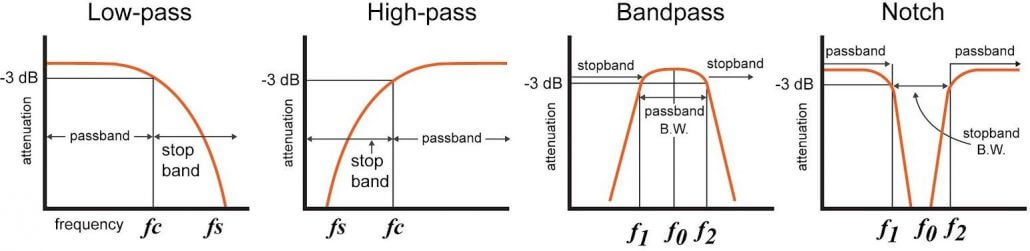

# **Data Cleaining - Preprocessing** 


In [35]:
raw_data = False
if raw_data == True:
    # assign directory
    directory = '/content/drive/MyDrive/COGS 138 Project/data/'
    # iterate over files in that directory
    
    vhdr_files = []
    for filename in os.scandir(directory):
        if filename.is_file():
            if '.vhdr' in filename.path:
                vhdr_files.append(filename.path)

In [36]:
start_preprocessing = False
chan_picks = ['Fp2', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC6']

if start_preprocessing == True:
  
    counter = 0

    for i in vhdr_files:
        print(counter)
        raw = mne.io.read_raw_brainvision(i,# file name with 'vhdr'
                                            preload=True)

        raw.set_channel_types({'ROc':'eog','LOc':'eog','Aux1':'stim'})# define channel types
        montage = mne.channels.make_standard_montage('standard_1020')# read standard montage for later plotting
        raw.set_montage(montage)

        raw.pick_channels(['Fp2', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC6'], ordered=False)
      #picks = mne.pick_channels(ch_names = all_channels, include = chan_picks)# pick channels I wish to work on

        raw.filter(
              l_freq = 0.1,
              h_freq = 50,
              l_trans_bandwidth=0.01,
              h_trans_bandwidth='auto',
              filter_length= 'auto'# with filter length of 30 seconds
              )

        noise_cov = mne.compute_raw_covariance(raw.set_eeg_reference('average'))# compute the covariance so that we have better estimate of ICA components

        raw.notch_filter(np.arange(60,241,60))# apply notch filter

        ica = ICA(n_components = None , # Use "None" pass all possible PCAs, could change to .95 for PCAs accounting 95% of the variance, could be faster
              method='fastica',# more stable in enhancing reproducibility and stability of results compared to other methods
              max_iter = 3000, # maximum iterations for ICA if not converage
              noise_cov = noise_cov, 
              random_state = 0, # Set a fixed random state to output the same results each time running this script
              )
        ica.fit(raw)# fitting step size

      # """Final step to have ICA corrected raw data"""
        raw = ica.apply(raw, exclude=ica.exclude)# output the ICA corrected data

        savename = i[:-5] + '.fif'

        raw.save(savename) # file name

        counter += 1

In [37]:
# assign directory
directory = '/content/drive/MyDrive/COGS 138 Project/data'

# iterate over files in
# that directory
fif_files = []

for filename in os.scandir(directory):
    if filename.is_file():
        if '.fif' in filename.path:
            fif_files.append(filename.path)

# **Data Visualization**

Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj11_l5nap_day1.fif...


<ipython-input-38-c3320c4b0bf6>:1: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj11_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_example = mne.io.read_raw_fif(fif_files[0],  preload=True)


    Range : 0 ... 1858749 =      0.000 ...  1858.749 secs
Ready.
Reading 0 ... 1858749  =      0.000 ...  1858.749 secs...
Effective window size : 2.048 (s)


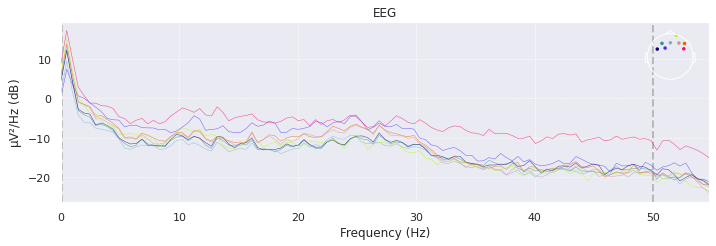

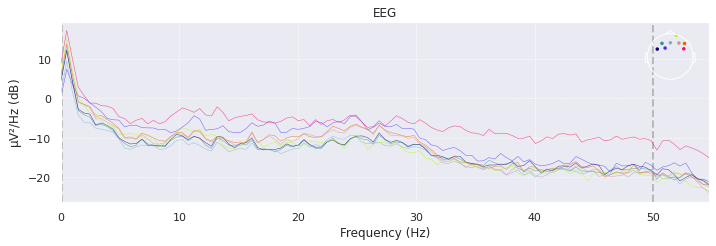

In [38]:
raw_example = mne.io.read_raw_fif(fif_files[0],  preload=True)

#To visualize the power spectral density across data"""
raw_example.plot_psd(tmin=0.0, # initial time to show
              tmax=60.0, # end time to show
              fmin=0.0, # initial frequency to show
              fmax=55.0, # end frequency to show
              area_mode='std', # change to 'range'
              )



Using matplotlib as 2D backend.


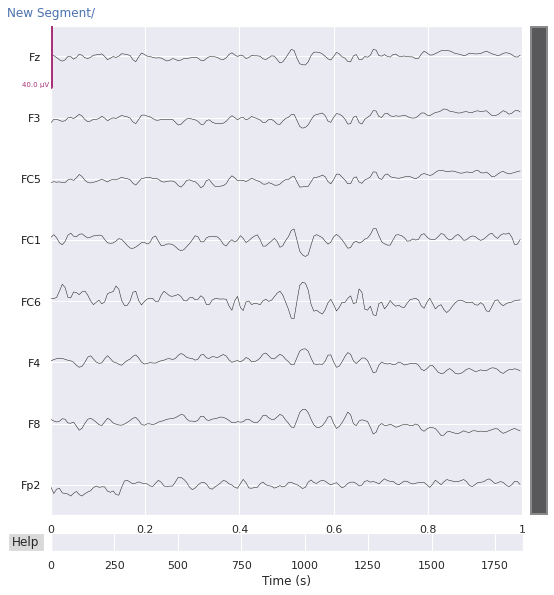

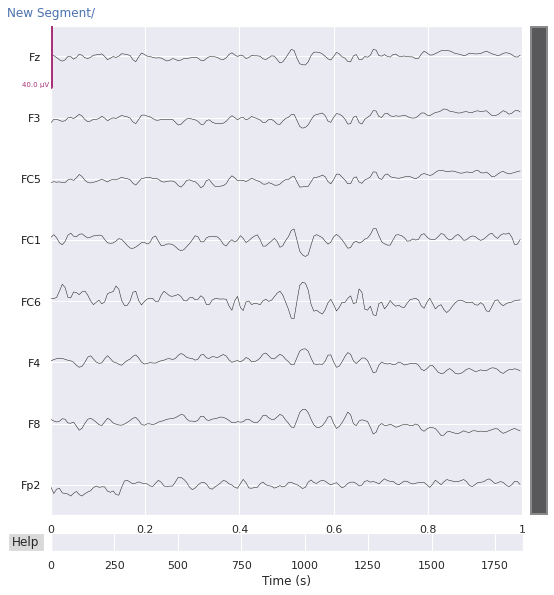

In [39]:
raw_example.plot(start = 0., # initial time to show
         duration = 1, # time window (sec) to plot in a given time
         n_channels = 8 # number of channels to plot at once
        )

**After Cleaning the EEG Data I wanted to look into the Nap Behavior Recogniton Test Results of Low Load (L2) and High Load (L5) to do some simple T-Testing to see the overall results Recogniton Test Results for before the nap and after the nap**

In [40]:
subjects

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0
3,14,18,Male,84.7,65.0,70.0,75.0,58.0,65.0
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0


In [41]:
L2_Delta = subjects['L2 REC2'] - subjects['L2 REC1']
L5_Delta = subjects['L5 REC2'] - subjects['L5 REC1']

subjects['L2 Delta'] = L2_Delta
subjects['L5 Delta'] = L5_Delta

In [66]:
subjects['L2 Delta'].plot.kde(color = 'purple')
subjects['L5 Delta'].plot.kde(color = 'green')

plt.title('Delta of Test Scores')
plt.legend()

KeyError: ignored

In [43]:
df2 = subjects.drop([10, 14], axis = 0)

**Standard T-Test between subjects same day task**

Since the data is left skwed since most subject did well on the task, a Wilcoxon signed-rank test might be more accurate since the most scores are between 60% to 100%. The median is a better representation

### Hypothesis being test is:

**Null hypothesis** $(H0): ud = 0$, which translates to the mean difference between Load # Recognition 1 and Load # Recognition 2 is equal to 0.

**Alternative hypothesis** $(H1): ud ≠ 0$, which translates to the mean difference between Load # Recognition 1 and Load # Recognition 2 is not equal to 0.

If the p-value is less than 0.05, one can reject the null hypothesis.

In [44]:
from scipy.stats import ttest_rel, wilcoxon, ttest_1samp

In [45]:
ttest_L2 = ttest_rel(df2['L2 REC1'], df2['L2 REC2']) 
ttest_L5 = ttest_rel(df2['L5 REC1'], df2['L5 REC2'])

print('T-Test: The p-value of L2 task 1 and task 2 is', + ttest_L2.pvalue)
print('T-Test: The p-value of L5 task 1 and task 2 is', + ttest_L5.pvalue, '\n')

wilcoxon_L2 = wilcoxon(df2['L2 REC1'], df2['L2 REC2']) 
wilcoxon_L5 = wilcoxon(df2['L5 REC1'], df2['L5 REC2'])

print('Wilcoxon signed-rank test: The p-value of L2 task 1 and task 2 is', + wilcoxon_L2.pvalue)
print('Wilcoxon signed-rank test: The p-value of L5 task 1 and task 2 is', + wilcoxon_L5.pvalue)

T-Test: The p-value of L2 task 1 and task 2 is 0.0032604506387410898
T-Test: The p-value of L5 task 1 and task 2 is 0.5284256049193196 

Wilcoxon signed-rank test: The p-value of L2 task 1 and task 2 is 0.007642630544480432
Wilcoxon signed-rank test: The p-value of L5 task 1 and task 2 is 0.9128157621599354


In [46]:
ttest_rel(df2['L2 Delta'], df2['L5 Delta'])

Ttest_relResult(statistic=-1.9639610121239313, pvalue=0.06610205619157077)

# **Exploratory Data Anaylsis**

We decided to compare the average EEG voltage with the subject’s scores in the before napping low-load task, after napping low-load task, before napping day 2 high-load task, and the after napping day 2 high-load task. Our goal was to see if there was a possible correlation between the average voltage and the subject's score. To do so, we utilized pandas dataframes and the seaborn package to plot the results.  The reason we chose to do the average voltage was because we were interested in the frontal region in general which we found to be an important region in working memory. Also, analyzing each channel against the score would be too time consuming so we opted out of doing that. 

In [47]:
subjects = pd.read_csv(os.path.join(directory,'NapEEGBehavior.csv'))

subjects

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0
3,14,18,Male,84.7,65.0,70.0,75.0,58.0,65.0
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0


In [51]:
# # iterate over files in
# # that directory
fif_files = []

for filename in os.scandir(directory):
  
  if filename.is_file():
        if '.fif' in filename.path:
            fif_files.append(filename.path)

output_list = []

In [52]:
#creates dictionary with average raw voltage value for each subject on each day
sub_avg_values = {}

for i in fif_files:
    
    raw = mne.io.read_raw_fif(i,# file name with 'fif'
                                    preload=True)
    output_list.append(raw)
    #convert raw data to dataframe
    raw_df = raw.to_data_frame()
    focus_channels = ['Fp2', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC6']
    new_df = raw_df[focus_channels]

    #This creates a dataframe with the average value of each channel
    chan_avg = []
    for chan in focus_channels:
        chan_avg.append(new_df[chan].mean())
        
    new_df.loc[len(new_df.index)] = chan_avg
    new_df
    average_df = new_df.iloc[[-1]]

    #overall mean for all channels
    overall_mean = float(average_df.mean(axis = 1))

    #create dictionary with overall subject and overall mean
    sub_avg_values[i[-20:-4]] = overall_mean
    #sub_avg_values

Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj11_l5nap_day1.fif...
    Range : 0 ... 1858749 =      0.000 ...  1858.749 secs
Ready.
Reading 0 ... 1858749  =      0.000 ...  1858.749 secs...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj11_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj11_l2nap_day2.fif...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj11_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1806049 =      0.000 ...  1806.049 secs
Ready.
Reading 0 ... 1806049  =      0.000 ...  1806.049 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj12_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj12_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1810549 =      0.000 ...  1810.549 secs
Ready.
Reading 0 ... 1810549  =      0.000 ...  1810.549 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj12_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj12_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1806899 =      0.000 ...  1806.899 secs
Ready.
Reading 0 ... 1806899  =      0.000 ...  1806.899 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj13_l5nap_day1.fif...
    Range : 0 ... 1802149 =      0.000 ...  1802.149 secs
Ready.


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj13_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


Reading 0 ... 1802149  =      0.000 ...  1802.149 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj13_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj13_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1805099 =      0.000 ...  1805.099 secs
Ready.
Reading 0 ... 1805099  =      0.000 ...  1805.099 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj14_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj14_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1803449 =      0.000 ...  1803.449 secs
Ready.
Reading 0 ... 1803449  =      0.000 ...  1803.449 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj15_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj15_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1802649 =      0.000 ...  1802.649 secs
Ready.
Reading 0 ... 1802649  =      0.000 ...  1802.649 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/Suj15_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/Suj15_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1805349 =      0.000 ...  1805.349 secs
Ready.
Reading 0 ... 1805349  =      0.000 ...  1805.349 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj16_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj16_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1805999 =      0.000 ...  1805.999 secs
Ready.
Reading 0 ... 1805999  =      0.000 ...  1805.999 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj16_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj16_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1806399 =      0.000 ...  1806.399 secs
Ready.
Reading 0 ... 1806399  =      0.000 ...  1806.399 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj17_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj17_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1804949 =      0.000 ...  1804.949 secs
Ready.
Reading 0 ... 1804949  =      0.000 ...  1804.949 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj17_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj17_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1811799 =      0.000 ...  1811.799 secs
Ready.
Reading 0 ... 1811799  =      0.000 ...  1811.799 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj18_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj18_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1803199 =      0.000 ...  1803.199 secs
Ready.
Reading 0 ... 1803199  =      0.000 ...  1803.199 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj18_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj18_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1805399 =      0.000 ...  1805.399 secs
Ready.
Reading 0 ... 1805399  =      0.000 ...  1805.399 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj19_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj19_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1806249 =      0.000 ...  1806.249 secs
Ready.
Reading 0 ... 1806249  =      0.000 ...  1806.249 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj19_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj19_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1802649 =      0.000 ...  1802.649 secs
Ready.
Reading 0 ... 1802649  =      0.000 ...  1802.649 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj20_l5nap_day1.fif...
    Range : 0 ... 1825449 =      0.000 ...  1825.449 secs
Ready.


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj20_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


Reading 0 ... 1825449  =      0.000 ...  1825.449 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj20_l2nap_day2.fif...
    Range : 0 ... 1807249 =      0.000 ...  1807.249 secs
Ready.


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj20_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


Reading 0 ... 1807249  =      0.000 ...  1807.249 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj21_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj21_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1816949 =      0.000 ...  1816.949 secs
Ready.
Reading 0 ... 1816949  =      0.000 ...  1816.949 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj21_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj21_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1803149 =      0.000 ...  1803.149 secs
Ready.
Reading 0 ... 1803149  =      0.000 ...  1803.149 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj22_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj22_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1805499 =      0.000 ...  1805.499 secs
Ready.
Reading 0 ... 1805499  =      0.000 ...  1805.499 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj22_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj22_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1808649 =      0.000 ...  1808.649 secs
Ready.
Reading 0 ... 1808649  =      0.000 ...  1808.649 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj23_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj23_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1804149 =      0.000 ...  1804.149 secs
Ready.
Reading 0 ... 1804149  =      0.000 ...  1804.149 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj23_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj23_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1807699 =      0.000 ...  1807.699 secs
Ready.
Reading 0 ... 1807699  =      0.000 ...  1807.699 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj25_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj25_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1827349 =      0.000 ...  1827.349 secs
Ready.
Reading 0 ... 1827349  =      0.000 ...  1827.349 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj26_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj26_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1804649 =      0.000 ...  1804.649 secs
Ready.
Reading 0 ... 1804649  =      0.000 ...  1804.649 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj26_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj26_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1830449 =      0.000 ...  1830.449 secs
Ready.
Reading 0 ... 1830449  =      0.000 ...  1830.449 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj27_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj27_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1875249 =      0.000 ...  1875.249 secs
Ready.
Reading 0 ... 1875249  =      0.000 ...  1875.249 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj27_l2nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj27_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1804549 =      0.000 ...  1804.549 secs
Ready.
Reading 0 ... 1804549  =      0.000 ...  1804.549 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj28_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj28_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1807649 =      0.000 ...  1807.649 secs
Ready.
Reading 0 ... 1807649  =      0.000 ...  1807.649 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj28_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj28_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1811849 =      0.000 ...  1811.849 secs
Ready.
Reading 0 ... 1811849  =      0.000 ...  1811.849 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj29_l5nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj29_l5nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1804949 =      0.000 ...  1804.949 secs
Ready.
Reading 0 ... 1804949  =      0.000 ...  1804.949 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj29_l2nap_day2.fif...
    Range : 0 ... 1803799 =      0.000 ...  1803.799 secs
Ready.


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj29_l2nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


Reading 0 ... 1803799  =      0.000 ...  1803.799 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj32_l2nap_day1.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj32_l2nap_day1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1803899 =      0.000 ...  1803.899 secs
Ready.
Reading 0 ... 1803899  =      0.000 ...  1803.899 secs...
Opening raw data file /content/drive/MyDrive/COGS 138 Project/data/suj32_l5nap_day2.fif...


<ipython-input-52-36531211ed8e>:7: RuntimeWarning: This filename (/content/drive/MyDrive/COGS 138 Project/data/suj32_l5nap_day2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  preload=True)


    Range : 0 ... 1830049 =      0.000 ...  1830.049 secs
Ready.
Reading 0 ... 1830049  =      0.000 ...  1830.049 secs...


In [53]:
all_avgs = df.from_dict(sub_avg_values, orient = 'index', columns = ['raw_avg_volt'])
all_avgs =all_avgs.reset_index(level=0)
all_avgs = all_avgs.rename(columns = {'index': 'subjects'})
#all_avgs

In [54]:
#make a df with all subject raw values from day 1 only
day_one = all_avgs[all_avgs['subjects'].str.contains("day1")]
day_one['Subject ID'] = day_one.subjects.str[3:5]
day_one = day_one.astype({"Subject ID": int})
day_one = day_one.rename(columns = {'raw_avg_volt': 'avg_volt_day1'})
#day_one

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
day_two = all_avgs[all_avgs['subjects'].str.contains("day2")]
day_two['Subject ID'] = day_two.subjects.str[3:5]
day_two = day_two.astype({"Subject ID": int})
day_two = day_two.rename(columns = {'raw_avg_volt': 'avg_volt_day2'})
#day_two

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
from functools import reduce
combined_avg = reduce(lambda x,y: pd.merge(x,y, on='Subject ID', how='outer'), [subjects, day_one, day_two])
#combined_avg

In [57]:
combined_avg = combined_avg.dropna()
combined_avg = combined_avg.drop(['subjects_x', 'subjects_y'], axis = 1)
combined_avg

,Subject ID,Age,Sex,L2 WM,L2 REC1,L2 REC2,L5 WM,L5 REC1,L5 REC2,avg_volt_day1,avg_volt_day2
0,11,42,Male,95.9,83.0,78.0,95.0,86.0,73.0,5.214575e-11,7.722827e-12
1,12,19,Male,98.0,85.0,76.0,87.5,61.0,62.0,8.600408e-10,-1.201686e-10
2,13,27,Male,78.6,62.0,64.0,70.0,59.0,60.0,-5.325395e-11,-1.409943e-10
4,15,23,Female,95.9,88.0,86.0,95.0,76.0,73.0,3.260061e-10,5.742283e-10
5,16,35,Male,99.0,79.0,70.0,100.0,81.0,74.0,1.450062e-11,1.847762e-11
6,17,21,Male,97.0,84.0,84.0,97.5,72.0,69.0,2.990549e-10,1.058640e-11
7,18,19,Female,93.9,76.0,65.0,85.0,75.0,60.0,-1.034892e-10,-8.174926e-10
8,19,26,Male,95.0,69.0,72.0,97.5,78.0,77.0,3.335940e-11,1.506287e-10
9,20,18,Male,99.0,86.0,76.0,100.0,80.0,81.0,8.071303e-11,-1.129634e-11
10,21,20,Male,98.0,87.0,27.0,97.5,76.0,73.0,-1.686921e-11,-2.652526e-10


After finding the average voltage of each subject’s nap, we plotted them in four different graphs which compared the four scenarios listed above. We plotted the points in a scatter plot and included a linear regression model to show a correlation line. Finally, with pandas, we calculated the correlation coefficient, r (scale between -1, +1). After calculating the correlation coefficients, we unfortunately found no significant correlation above 0.2. The only significant observation that could be made is that the low-load tasks had a greater correlation coefficient than the high-load tasks. This means that there was a greater positive correlation between average voltage and score for the day 1 low-load tasks. 

Day 1 Before Napping vs Average Raw Volt, Correlation Coefficient(r): 0.25938796280275744


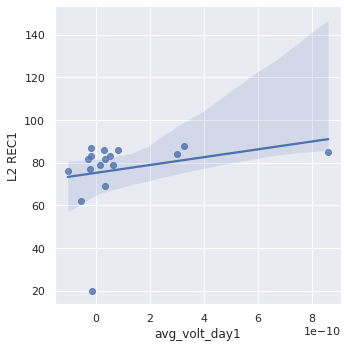

In [58]:
sns.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

sns.lmplot(x='avg_volt_day1',y='L2 REC1',data=combined_avg,fit_reg=True) 
print("Day 1 Before Napping vs Average Raw Volt, Correlation Coefficient(r): " + str(combined_avg['avg_volt_day1'].corr(combined_avg['L2 REC1'])))


Day 1 After Napping vs Average Raw Volt, Correlation Coefficient(r): 0.2849262564759565


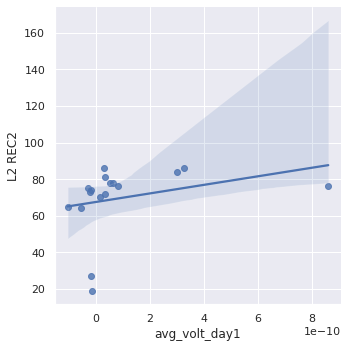

In [59]:
sns.lmplot(x='avg_volt_day1',y='L2 REC2',data=combined_avg,fit_reg=True) 
print("Day 1 After Napping vs Average Raw Volt, Correlation Coefficient(r): " + str(combined_avg['avg_volt_day1'].corr(combined_avg['L2 REC2'])))

Day 2 Before Napping vs Average Raw Volt, Correlation Coefficient(r): -0.16943534096997312


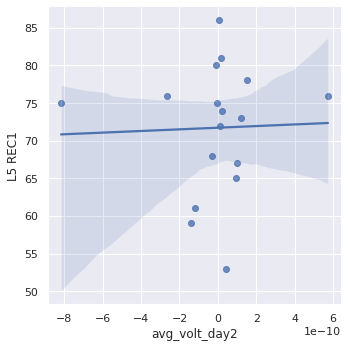

In [60]:
sns.lmplot(x='avg_volt_day2',y='L5 REC1',data=combined_avg,fit_reg=True) 
print("Day 2 Before Napping vs Average Raw Volt, Correlation Coefficient(r): " + str(combined_avg['avg_volt_day1'].corr(combined_avg['L5 REC1'])))

Day 2 After Napping vs Average Raw Volt, Correlation Coefficient(r): 0.30157018394681506


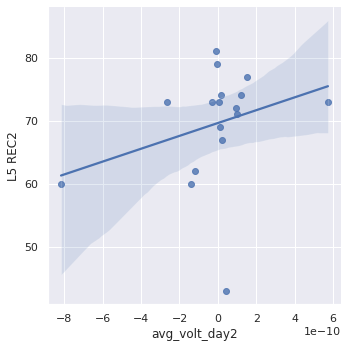

In [61]:
sns.lmplot(x='avg_volt_day2',y='L5 REC2',data=combined_avg,fit_reg=True) 
print("Day 2 After Napping vs Average Raw Volt, Correlation Coefficient(r): " + str(combined_avg['avg_volt_day2'].corr(combined_avg['L5 REC2'])))

# **Data Analysis & Results**

The function below is from stack overflow that takes in uneven 2D arrays and reshapes it to match for a 3D array for Epocching. Missing Values are filled with the mean of a random subjects EEG

In [68]:
def stack_uneven(arrays, fill_value  = np.mean(output_list[1])):
    '''
    Fits arrays into a single numpy array, even if they are
    different sizes. `fill_value` is the default value.

    Args:
            arrays: list of np arrays of various sizes
                (must be same rank, but not necessarily same size)
            fill_value (float, optional):

    Returns:
            np.ndarray
    '''
    sizes = [a.shape for a in arrays]
    max_sizes = np.max(list(zip(*sizes)), -1)
    
    # The resultant array has stacked on the first dimension
    result = np.full((len(arrays),) + tuple(max_sizes), fill_value)
    
    for i, a in enumerate(arrays):
      # The shape of this array `a`, turned into slices
      slices = tuple(slice(0,s) for s in sizes[i])
      # Overwrite a block slice of `result` with this array `a`
      result[i][slices] = a
    return result

ValueError: ignored

# The RAM was too low for the memory intake on Google Colab and Jupyter Notebook crashed at least 100000 times when we tried to run it

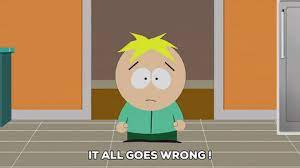

In [64]:
arrs = stack_uneven(arrays = output_list, fill_value = np.mean(output_list[1]))

NameError: ignored

In [ ]:
epochs = mne.EpochsArray(arrs, raw.info)

In [ ]:
epochs.average().plot()

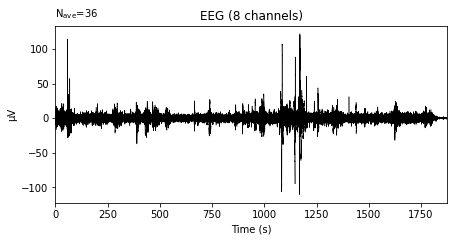

From one of the trials of re running the notebook we were able to plot the epoch average time frequncey plot

# **WHAT WE WOULD'VE IMPLEMENTED**

EEG data in a way that by observing the results of the pre/post nap data and predicting which of our subjects was inclined to score better on their task. To utilize the EEG data, each participant would have been optimized through the FOOOF package. We would’ve utilized FOOOF by measuring putative oscillations, which is that peaks in the power spectrum are characterized by their specific center frequency shown in the power spectrum density plot from the Data Visualization section. These peaks would have allowed us to use PCA (Principal Component Analysis) to find the largest eigenvectors that contribute to the variance of the peaks. 

This code below is implementation code for running PCA without a package created by a student in our group from COGS 118B. We believe this implementation would have allowed us to predict how poorly students would have performed on the n-back test. For some further analysis: performing the steps above separately per day could display the differences in EEG sleep between day one and day two. 

This might be an extra step too far but using a KMeans (hard clustering algorithm) to find the clusters of peaks. Observing which peaks are most similar across all the subjects. This can be used to create a 3D array of random peaks from each cluster across a frequency to observe how an EEG of a participant is created. 

In a perfect world this analysis can provide the tools to build a machine learning algorithm where given a test score, the analysis plus an algorithm can plot the EEG data of the eight chosen channels of the given participant.


# **Conclusion & Discussion**

Our results unfortunately are inconclusive on whether or not we would be able to predict these negative results from the nap EEG data. Due to an overall large amount of EEG data and ambiguous results we cannot conclusively predict whether or not there would be a worse effect on the subjects. Below we have discussed what would be needed for us to further this research along with possibly gaining more conclusive results.

For our analysis we had a few main limiting factors that affected our results. First and foremost was the RAM on google colab, this fixed limit of memory constrained our data and forced us to look at ways to narrow our analysis. 

Additionally, we were unable to delve further into our EEG analysis of obtaining epochs(specific/significant time windows in EEG data) since our data did not include an important component called “events”. Since events dictate what was occurring during certain time points in the EEG data, without it, the EEG data loses meaningfulness in terms of associating it with any subject’s actions. 

If we were to continue this research project into the future, as mentioned above,  we believe that we would need not only more time and participants but also more resources in the form of analysis. Due to the sheer amount of channels that EEG had for us to analyze, we had to narrow it down in order to analyze the data within a certain amount of time. To further the research being able to look into each and every challenge provided by the EEG would be crucial. Furthermore we were unaware of exactly how the participants were tested, although we understood that it was a memory based task, it was not outlined exactly how long after the nap they took the exam or how long it took them to sleep. Being able to understand this gives us power to make more informed decisions about our datasets as we would precisely know what is being tested. With more time we would be able to also bring in an ML algorithm in order to help us in predicting our EEG channels based on the completed test scores.
